# Conditional Probability: Significance of results!
In this notebook, we graph the conditional probability, or chance of one event happening if one has already occured, with binomial confidence intervals for the stars in our sample. We particularly focus on the star being a Fast Yellow Pulsating Supergiant (FYPS), having an h-alpha in emission, and binary status.

In [23]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

## Ranges
We can find the ranges of each conditional probability by calculating the binomial confidence intervals and finding the median and difference between the maximum or minimum and the median fraction. We print those values below.

In [12]:
# use latex for axis
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
    # halpha/total 28/39
bincon_halpha = st.binom_conf_interval(28, 39)
middle_halpha = ((bincon_halpha[1]-bincon_halpha[0])/2)+bincon_halpha[0]
diff_halpha = (bincon_halpha[1]-bincon_halpha[0])/2
print(r'$p(H\alpha)$ ' + str(middle_halpha) + '+-' + str(diff_halpha))

    # binary confirmed/total 20/39
bincon_bin = st.binom_conf_interval(20, 39)
middle_bin = ((bincon_bin[1]-bincon_bin[0])/2)+bincon_bin[0]
diff_bin = (bincon_bin[1]-bincon_bin[0])/2
print(r'$p(\rm binary)$ ' + str(middle_bin) + '+-' + str(diff_bin))
    
    # FYPS/total 13/39
bincon_fyps = st.binom_conf_interval(13, 39)
middle_fyps = ((bincon_fyps[1]-bincon_fyps[0])/2)+bincon_fyps[0]
diff_fyps = (bincon_fyps[1]-bincon_fyps[0])/2
print(r'$p(\rm FYPS)$ ' + str(middle_fyps) + '+-' + str(diff_fyps))
    
    # (FYPS halpha)/halpha 13/28
bincon_fypshalpha = st.binom_conf_interval(13, 28)
middle_fypshalpha = ((bincon_fypshalpha[1]-bincon_fypshalpha[0])/2)+bincon_fypshalpha[0]
diff_fypshalpha = (bincon_fypshalpha[1]-bincon_fypshalpha[0])/2
print(r'$p(\rm FYPS | {H\alpha})$ ' + str(middle_fypshalpha) + '+-' + str(diff_fypshalpha))
    
    # (FYPS binary confirmed)/binary confirmed 4/20
count=0
for i in range(39):
    if (df.loc[i, 'FYPS'] == True) and (df.loc[i, 'binary'] == 1):
        count+=1
bincon_fypsbin = st.binom_conf_interval(count, 20)
middle_fypsbin = ((bincon_fypsbin[1]-bincon_fypsbin[0])/2)+bincon_fypsbin[0]
diff_fypsbin = (bincon_fypsbin[1]-bincon_fypsbin[0])/2
print(r'$p({\rm FYPS} | {\rm binary})$ ' + str(middle_fypsbin) + '+-' + str(diff_fypsbin))
    
    # (binary confirmed halpha)/halpha
count1=0
for i in range(39):
    if (df.loc[i, 'halpha_emission'] == True) and (df.loc[i, 'binary'] == 1):
        count1+=1
bincon_binhalpha = st.binom_conf_interval(count1, 28)
middle_binhalpha = ((bincon_binhalpha[1]-bincon_binhalpha[0])/2)+bincon_binhalpha[0]
diff_binhalpha = (bincon_binhalpha[1]-bincon_binhalpha[0])/2
print(r'$p(\rm binary | {H\alpha})$ ' + str(middle_binhalpha) + '+-' + str(diff_binhalpha))
    
    # fyps bin confirmed / fyps
bincon_binfyps = st.binom_conf_interval(count, 13)
middle_binfyps = ((bincon_binfyps[1]-bincon_binfyps[0])/2)+bincon_binfyps[0]
diff_binfyps = (bincon_binfyps[1]-bincon_binfyps[0])/2
print(r'$p(\rm binary | {\rm FYPS})$ ' + str(middle_binfyps) + '+-' + str(diff_binfyps))
    
    #halpha fyps / fyps 13/13
bincon_halphafyps = st.binom_conf_interval(13, 13)
middle_halphafyps = ((bincon_halphafyps[1]-bincon_halphafyps[0])/2)+bincon_halphafyps[0]
diff_halphafyps = (bincon_halphafyps[1]-bincon_halphafyps[0])/2
print(r'$p(H\alpha | {\rm FYPS})$ ' + str(middle_halphafyps) + '+-' + str(diff_halphafyps))

$p(H\alpha)$ 0.7124999888497899+-0.07135935760066203
$p(\rm binary)$ 0.5124999993441053+-0.07903167954499024
$p(\rm FYPS)$ 0.33750000852663126+-0.07465204690136562
$p(\rm FYPS | {H\alpha})$ 0.4655172438749858+-0.09261879177798021
$p({\rm FYPS} | {\rm binary})$ 0.21428574284167323+-0.08844854604475305
$p(\rm binary | {H\alpha})$ 0.43103448774997155+-0.09192845580640466
$p(\rm binary | {\rm FYPS})$ 0.3214285981997816+-0.12411393559250877
$p(H\alpha | {\rm FYPS})$ 0.9642856446805679+-0.03571435531943212


## Plots
We can then make plots of these values to then observe any overlaps between the conditionals for the entire sample in comparison to other portions.

In [46]:
def binconf():
    """
    binomial confidence interval graph to show relationship between different conditional probabilities
    """
    fig, ax = plt.subplots(dpi=300)
    # halpha/total 28/39
    bincon_halpha = st.binom_conf_interval(28, 39)
    middle_halpha = ((bincon_halpha[1]-bincon_halpha[0])/2)+bincon_halpha[0]
    diff_halpha = (bincon_halpha[1]-bincon_halpha[0])/2
    ax.errorbar(1, middle_halpha, yerr=diff_halpha, color='red', fmt='o')
    # binary confirmed/total 20/39
    bincon_bin = st.binom_conf_interval(20, 39)
    middle_bin = ((bincon_bin[1]-bincon_bin[0])/2)+bincon_bin[0]
    diff_bin = (bincon_bin[1]-bincon_bin[0])/2
    ax.errorbar(3, middle_bin, yerr=diff_bin, color='k', fmt='o')
    
    # FYPS/total 13/39
    bincon_fyps = st.binom_conf_interval(13, 39)
    middle_fyps = ((bincon_fyps[1]-bincon_fyps[0])/2)+bincon_fyps[0]
    diff_fyps = (bincon_fyps[1]-bincon_fyps[0])/2
    ax.errorbar(6, middle_fyps, yerr=diff_fyps, color='purple', fmt='o')
    
    # (FYPS halpha)/halpha 13/28
    bincon_fypshalpha = st.binom_conf_interval(13, 28)
    middle_fypshalpha = ((bincon_fypshalpha[1]-bincon_fypshalpha[0])/2)+bincon_fypshalpha[0]
    diff_fypshalpha = (bincon_fypshalpha[1]-bincon_fypshalpha[0])/2
    ax.errorbar(7, middle_fypshalpha, yerr=diff_fypshalpha, color='purple', fmt='o')
    
    # (FYPS binary confirmed)/binary confirmed 4/20
    count=0
    for i in range(39):
        if (df.loc[i, 'FYPS'] == True) and (df.loc[i, 'binary'] == 1):
            count+=1
    bincon_fypsbin = st.binom_conf_interval(count, 20)
    middle_fypsbin = ((bincon_fypsbin[1]-bincon_fypsbin[0])/2)+bincon_fypsbin[0]
    diff_fypsbin = (bincon_fypsbin[1]-bincon_fypsbin[0])/2
    ax.errorbar(8, middle_fypsbin, yerr=diff_fypsbin, color='purple', fmt='o')
    
    # (binary confirmed halpha)/halpha
    count1=0
    for i in range(39):
        if (df.loc[i, 'halpha_emission'] == True) and (df.loc[i, 'binary'] == 1):
            count1+=1
    bincon_binhalpha = st.binom_conf_interval(count1, 28)
    middle_binhalpha = ((bincon_binhalpha[1]-bincon_binhalpha[0])/2)+bincon_binhalpha[0]
    diff_binhalpha = (bincon_binhalpha[1]-bincon_binhalpha[0])/2
    ax.errorbar(4, middle_binhalpha, yerr=diff_binhalpha, color='k', fmt='o')
    
    # fyps bin confirmed / fyps
    bincon_binfyps = st.binom_conf_interval(count, 13)
    middle_binfyps = ((bincon_binfyps[1]-bincon_binfyps[0])/2)+bincon_binfyps[0]
    diff_binfyps = (bincon_binfyps[1]-bincon_binfyps[0])/2
    ax.errorbar(5, middle_binfyps, yerr=diff_binfyps, color='k', fmt='o')
    
    # halpha fyps / fyps 13/13
    bincon_halphafyps = st.binom_conf_interval(13, 13)
    middle_halphafyps = ((bincon_halphafyps[1]-bincon_halphafyps[0])/2)+bincon_halphafyps[0]
    diff_halphafyps = (bincon_halphafyps[1]-bincon_halphafyps[0])/2 
    ax.errorbar(2, middle_halphafyps, yerr=diff_halphafyps, color='red', fmt='o')
    
    # plot line indicating 50%
    ax.axhline(.5, color='green', linestyle=':', linewidth=2)
    
    # plot highlighting colors to show overlap/no overlap
    ax.axhspan(middle_halpha+diff_halpha, middle_halpha-diff_halpha, color='red', alpha=0.3)
    ax.axhspan(middle_bin+diff_bin, middle_bin-diff_bin, color='gray', alpha=0.3)
    ax.axhspan(middle_fyps+diff_fyps, middle_fyps-diff_fyps, color='purple', alpha=0.3)
    # x and y labels
    x = ['', r'$P(H\alpha)$', r'$P(H\alpha | {\rm FYPS})$', r'$P(\rm binary)$',
         r'$P(\rm binary | {H\alpha})$', r'$P(\rm binary | {\rm FYPS})$',  r'$P(\rm FYPS)$', r'$P(\rm FYPS | {H\alpha})$', 
         r'$P({\rm FYPS} | {\rm binary})$']
    default_x_ticks = range(len(x))
    ax.set_ylabel('Fraction of Stars')
    ax.set_xticks(default_x_ticks, x, rotation = (45), fontsize = 10)

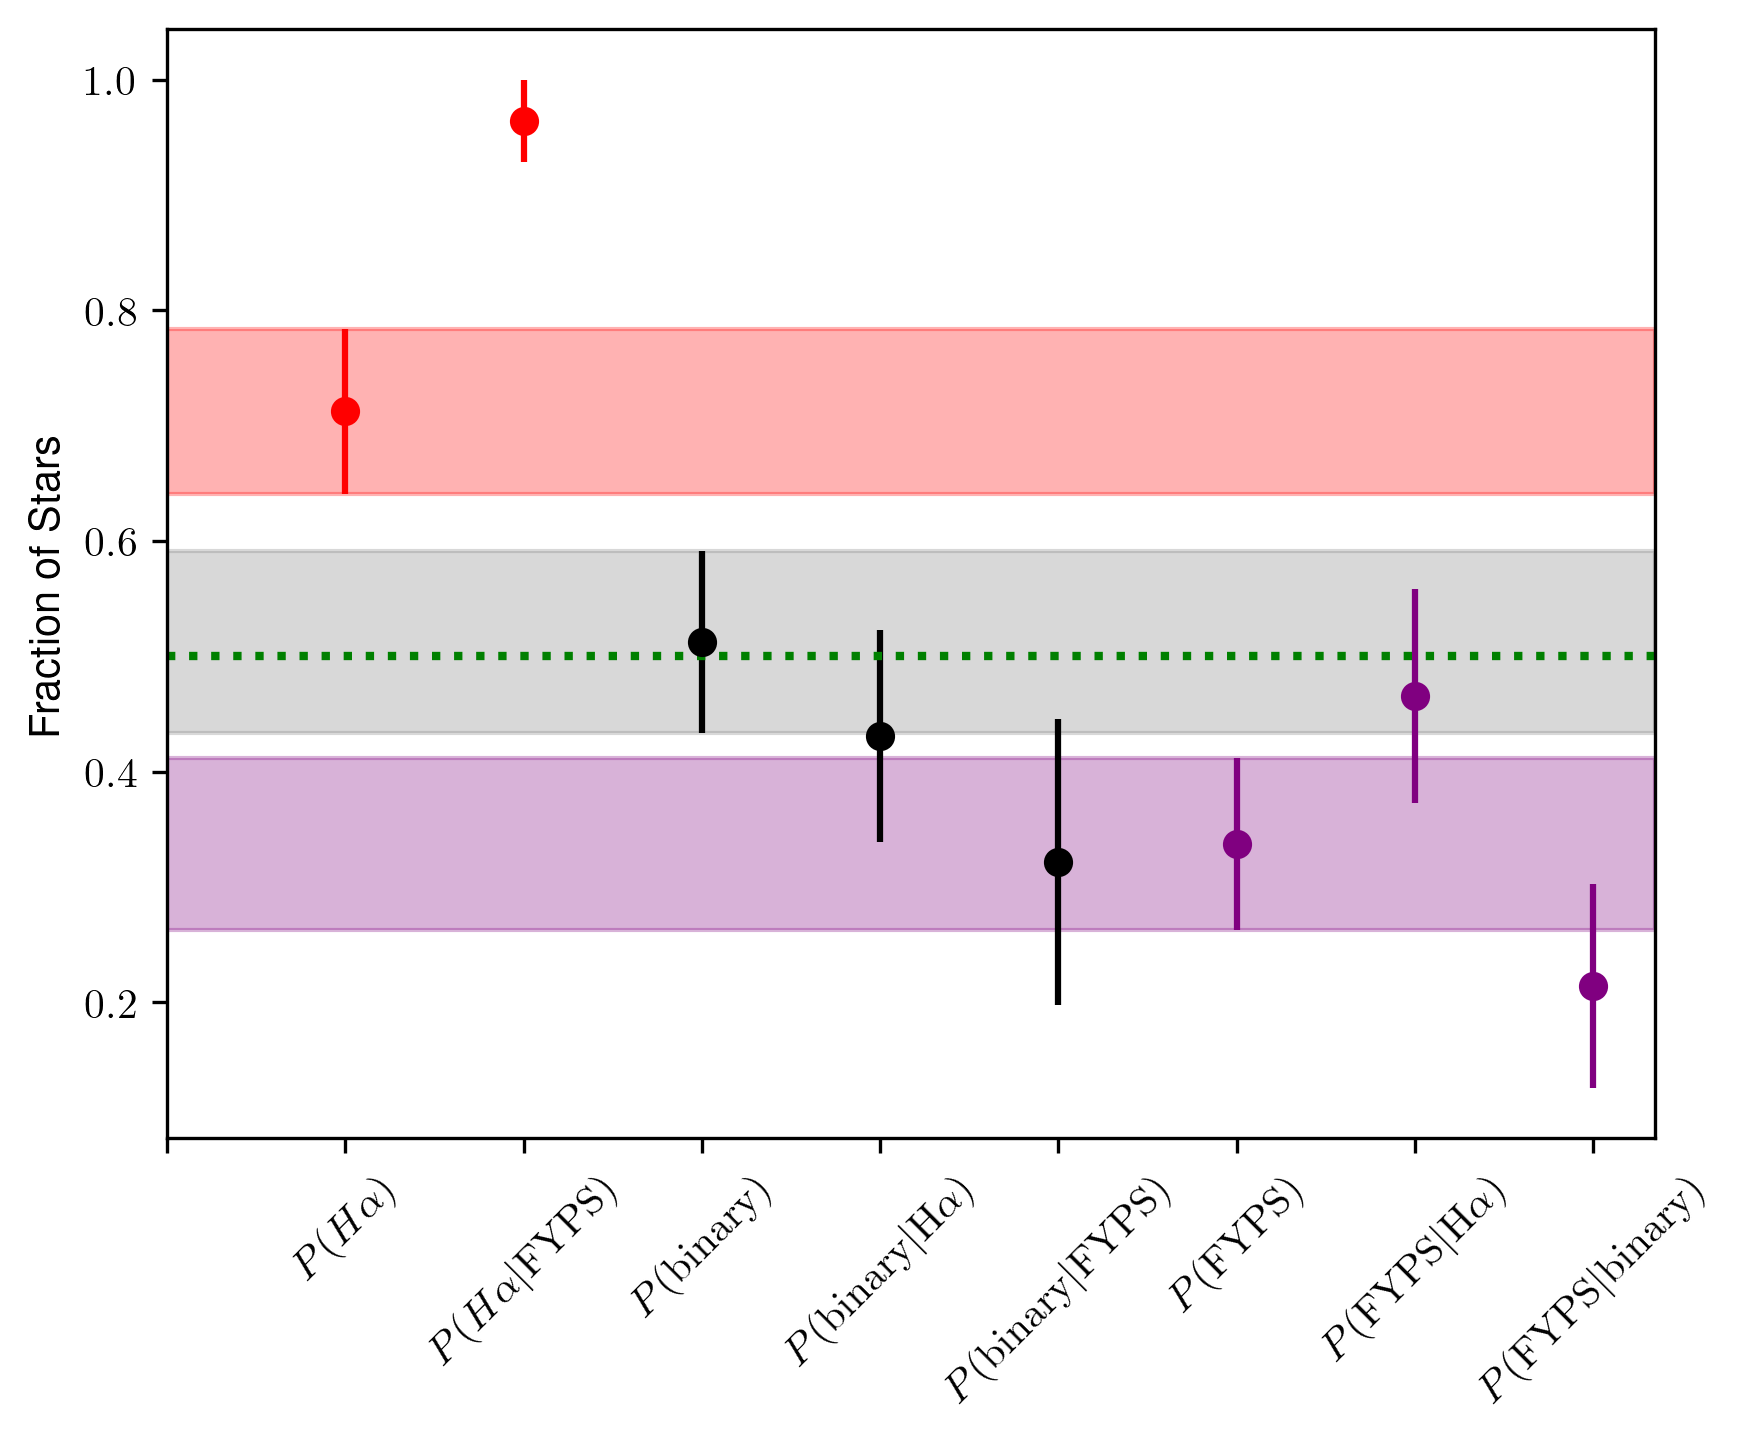

In [47]:
binconf()

In [54]:
def binconfcond():
    """
    condensed binomial confidence interval graph to show relationship between different conditional probabilities,
    specifically the importance of FYPS
    """
    fig, ax = plt.subplots(dpi=300)
    # halpha/total 28/39
    bincon_halpha = st.binom_conf_interval(28, 39)
    middle_halpha = ((bincon_halpha[1]-bincon_halpha[0])/2)+bincon_halpha[0]
    diff_halpha = (bincon_halpha[1]-bincon_halpha[0])/2
    ax.errorbar(1, middle_halpha, yerr=diff_halpha, color='red', fmt='o')
    # binary confirmed/total 20/39
    bincon_bin = st.binom_conf_interval(20, 39)
    middle_bin = ((bincon_bin[1]-bincon_bin[0])/2)+bincon_bin[0]
    diff_bin = (bincon_bin[1]-bincon_bin[0])/2
    ax.errorbar(3, middle_bin, yerr=diff_bin, color='k', fmt='o')
    
    # (FYPS binary confirmed)/binary confirmed 4/20
    count=0
    for i in range(39):
        if (df.loc[i, 'FYPS'] == True) and (df.loc[i, 'binary'] == 1):
            count+=1
    
    # fyps bin confirmed / fyps
    bincon_binfyps = st.binom_conf_interval(count, 13)
    middle_binfyps = ((bincon_binfyps[1]-bincon_binfyps[0])/2)+bincon_binfyps[0]
    diff_binfyps = (bincon_binfyps[1]-bincon_binfyps[0])/2
    ax.errorbar(4, middle_binfyps, yerr=diff_binfyps, color='black', fmt='o')
    
    #halpha fyps / fyps 13/13
    bincon_halphafyps = st.binom_conf_interval(13, 13)
    middle_halphafyps = ((bincon_halphafyps[1]-bincon_halphafyps[0])/2)+bincon_halphafyps[0]
    diff_halphafyps = (bincon_halphafyps[1]-bincon_halphafyps[0])/2
    ax.errorbar(2, middle_halphafyps, yerr=diff_halphafyps, color='red', fmt='o')
    
    # plot highlighting colors to show overlap/no overlap
    ax.axhspan(middle_halpha+diff_halpha, middle_halpha-diff_halpha, color='red', alpha=0.3)
    ax.axhspan(middle_bin+diff_bin, middle_bin-diff_bin, color='gray', alpha=0.3)
    
    # plot line indicating 50%
    ax.axhline(.5, color='green', linestyle=':', linewidth=2)
    
    #label x and y axis
    x = ['', r'$P(H\alpha)$', r'$P(H\alpha | {\rm FYPS})$', r'$P(\rm binary)$', r'$P(\rm binary | {\rm FYPS})$']
    default_x_ticks = range(len(x))
    ax.set_ylabel('Fraction of Stars')
    ax.set_xticks(default_x_ticks, x, rotation = (20), ha='right', fontsize = 15)

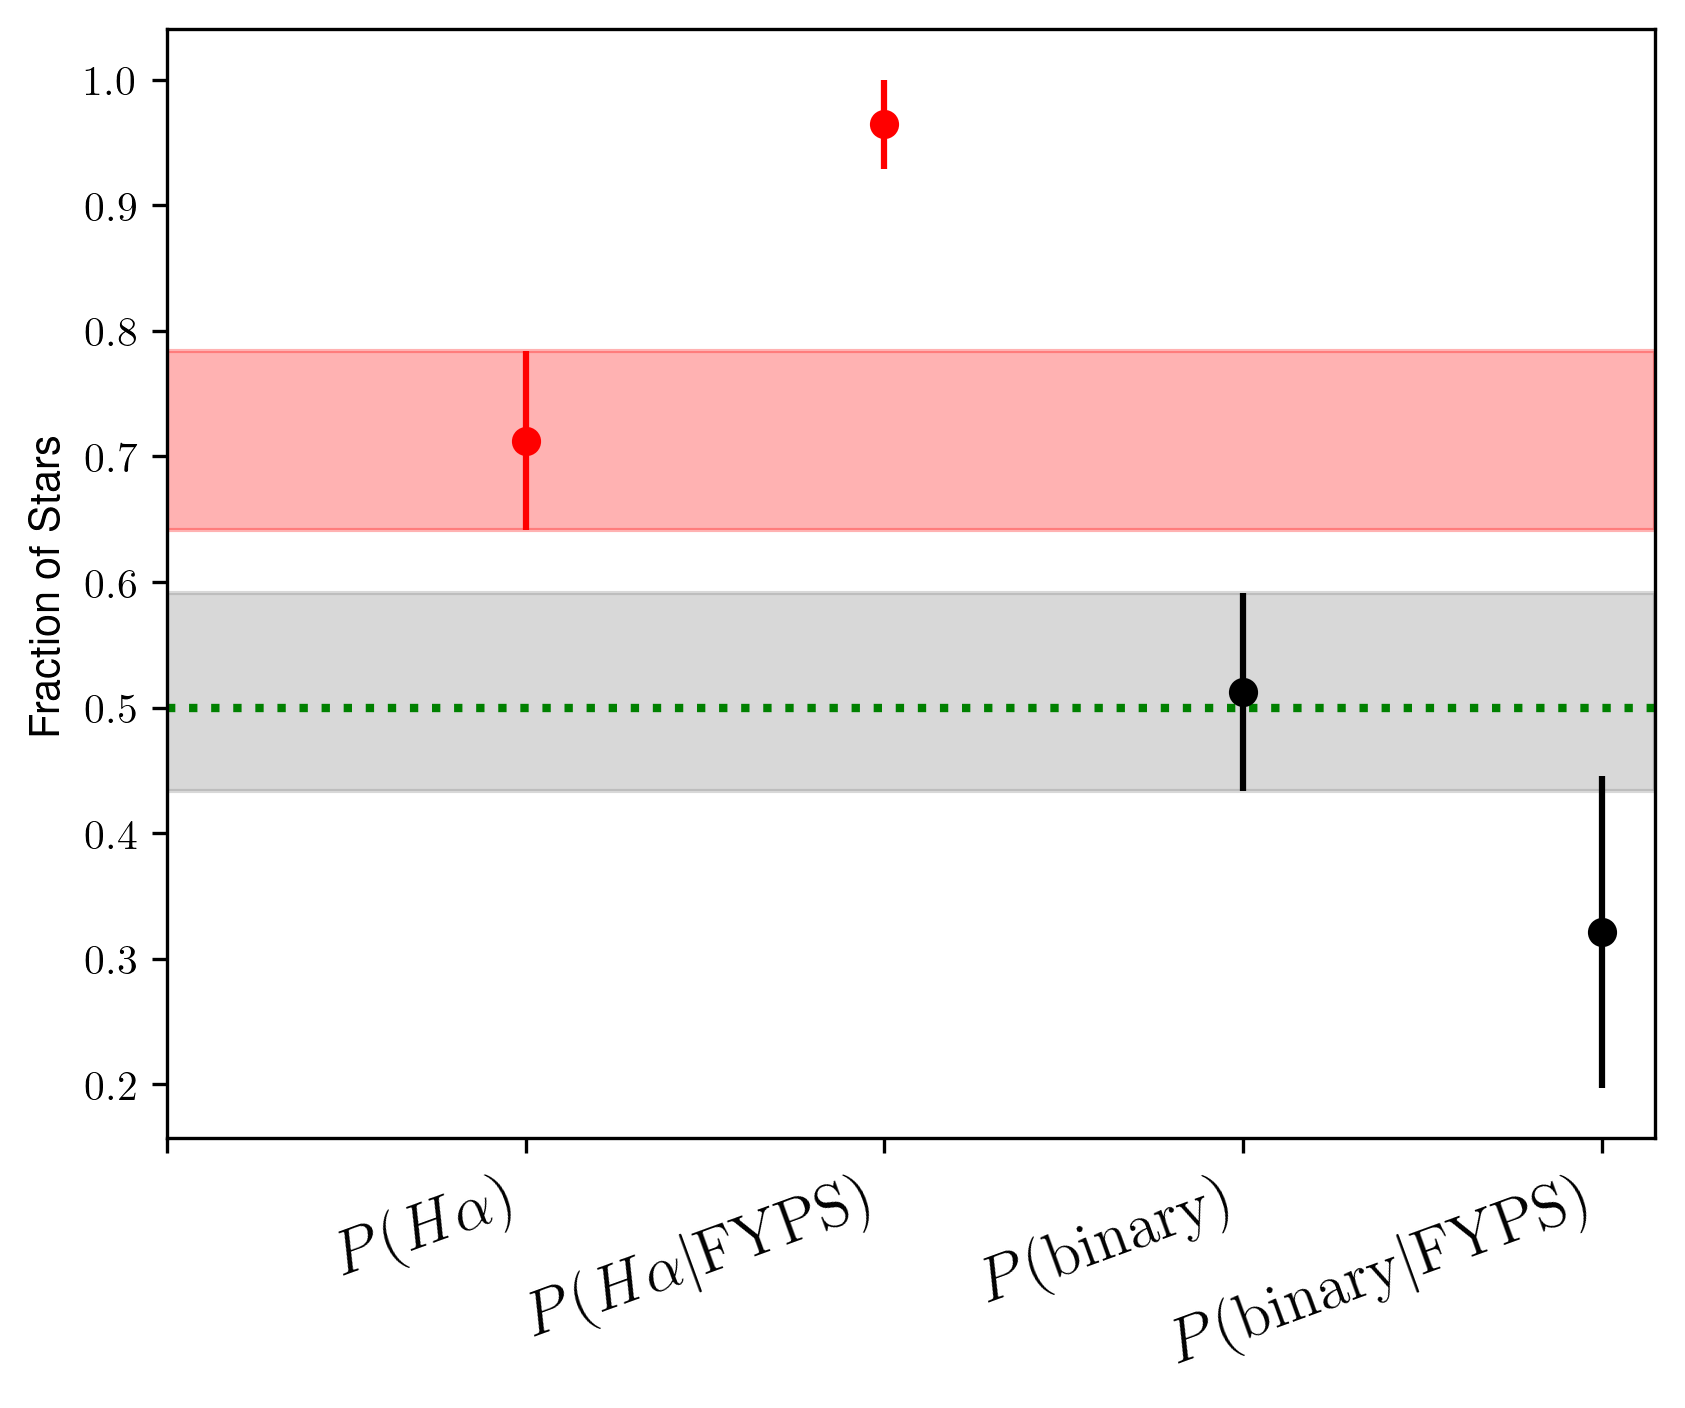

In [55]:
binconfcond()

# Conclusions
What we can conclude from these graphs are that FYPS are statistically more likely to be Hα emitters than the general population. This Hα in emission is indicative of circumstellar material, which is concurrent with expectations for post-red supergiants since it is a sign of mass loss. We can also conclude that our sample results are reliable as they are consistant with previous studies in the Large Magellenic Cloud with a binary fraction of 51% (Sana et al. 2013).